In [1]:
# Import required libraries
import pickle
import pandas as pd
from pytrends.request import TrendReq
from matplotlib import rcParams
%matplotlib inline
rcParams.update({'figure.autolayout': True})

## Defining the trends request

In [3]:
kw_list = ["nintendo"]
pytrends = TrendReq(hl='en-US', tz=360)
pytrends

In [4]:
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [6]:
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df

,nintendo,isPartial
date,,
2014-06-15,21,False
2014-06-22,20,False
2014-06-29,20,False
2014-07-06,21,False
2014-07-13,21,False
2014-07-20,22,False
2014-07-27,21,False
2014-08-03,20,False
2014-08-10,20,False


## "Dumping" the dataframe to pkl

In [8]:
dataDumpPath = "../data/extracted/Trends/dataDump.pkl"
interest_over_time_df.to_pickle(dataDumpPath)
interest_over_time_df = pd.read_pickle(dataDumpPath)
# interest_over_time_df.loc['2017-10-26']
print(interest_over_time_df.head())

            nintendo isPartial
date                          
2014-06-15        21     False
2014-06-22        20     False
2014-06-29        20     False
2014-07-06        21     False
2014-07-13        21     False


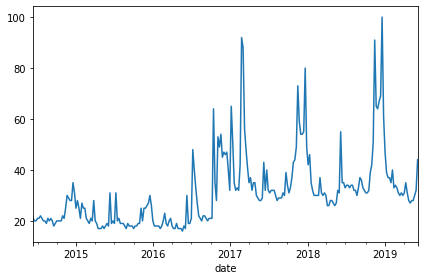

In [9]:
interest_over_time_df["nintendo"].plot()

## Interest by Region

In [10]:
interest_by_region_df = pytrends.interest_by_region()
interest_by_region_df

,nintendo
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


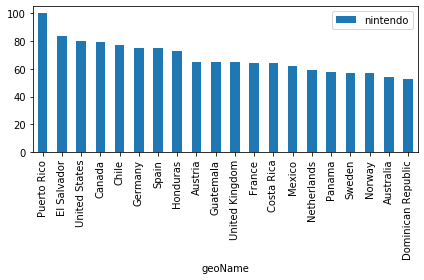

In [11]:
interest_by_region_df.sort_values(
    by=["nintendo"], ascending=False, inplace=True
)
interest_by_region_df.iloc[:20].plot.bar()

In [12]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrends.related_queries()
print(related_queries_dict)

{'nintendo': {'top':                     query  value
0         switch nintendo    100
1                  switch     98
2                     3ds     29
3            nintendo 3ds     29
4          nintendo games     22
5                      ds     21
6          super nintendo     20
7             nintendo ds     20
8                     wii     14
9            nintendo wii     14
10                   game     13
11                  mario     12
12            nintendo 64     11
13  nintendo switch games     10
14                pokemon     10
15           new nintendo      9
16       classic nintendo      8
17        nintendo 3ds xl      7
18                 3ds xl      7
19                    nes      6
20           nintendo nes      6
21           nintendo 2ds      6
22          mini nintendo      6
23                    2ds      6
24         nintendo wii u      6, 'rising':                            query  value
0          nintendo switch games  96450
1                         swit

In [23]:
# Get Google Keyword Suggestions
suggestions_dict = pytrends.suggestions(keyword='Dungeons & Dragons')
print(suggestions_dict)

[{'mid': '/m/026q9', 'title': 'Dungeons & Dragons', 'type': 'Game'}, {'mid': '/m/078r86', 'title': 'Dungeons & Dragons Online', 'type': 'Online game'}, {'mid': '/m/02d02j', 'title': "Player's Handbook", 'type': 'Book by Wizards RPG Team'}, {'mid': '/m/04ld1bs', 'title': 'Dungeons & Dragons', 'type': '1974'}, {'mid': '/m/02xc5p', 'title': 'Dungeons & Dragons', 'type': 'American animated series'}]


In [24]:
# Get Google Hot Trends data
trending_searches_df = pytrends.trending_searches()
print(trending_searches_df.head())

                       0
0  Australia vs Pakistan
1           Maren Morris
2            Nintendo E3
3            Jon Stewart
4          Banjo-Kazooie
